# 탐색적 자료 분석

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data_set = tf.keras.utils.get_file(fname = 'imdb.tar.gz', origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract = True)

84140032/84125825 [==============================] - 24s 0us/step


### 다운로드 받은 경로 출력

In [3]:
data_set

'/Users/kimhyunjo/.keras/datasets/imdb.tar.gz'

In [9]:
np.loadtxt('/Users/kimhyunjo/.keras/datasets/aclImdb/train/pos/0_9.txt', encoding = 'utf-8', dtype = 'str')

array(['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy.', 'It', 'ran',
       'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs',
       'about', 'school', 'life,', 'such', 'as', '"Teachers".', 'My',
       '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me',
       'to', 'believe', 'that', 'Bromwell', "High's", 'satire', 'is',
       'much', 'closer', 'to', 'reality', 'than', 'is', '"Teachers".',
       'The', 'scramble', 'to', 'survive', 'financially,', 'the',
       'insightful', 'students', 'who', 'can', 'see', 'right', 'through',
       'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness',
       'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of',
       'the', 'schools', 'I', 'knew', 'and', 'their', 'students.', 'When',
       'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student',
       'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'I',
       'immediately', 'recalled', '.........', 'at', '..........',
   

### 파일 경로 지정

In [11]:
print(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test', 'pos'))

os.listdir(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test', 'pos'))

/Users/kimhyunjo/.keras/datasets/aclImdb/test/pos


['4715_9.txt',
 '1930_9.txt',
 '3205_9.txt',
 '10186_10.txt',
 '147_10.txt',
 '7511_7.txt',
 '616_10.txt',
 '10460_10.txt',
 '3240_9.txt',
 '1975_9.txt',
 '3225_10.txt',
 '4381_9.txt',
 '6511_7.txt',
 '4667_7.txt',
 '716_10.txt',
 '6983_7.txt',
 '7463_9.txt',
 '10086_10.txt',
 '2612_10.txt',
 '3325_10.txt',
 '5568_8.txt',
 '1807_7.txt',
 '3474_10.txt',
 '6068_10.txt',
 '2384_8.txt',
 '803_10.txt',
 '12363_7.txt',
 '5775_10.txt',
 '10813_7.txt',
 '11813_10.txt',
 '835_8.txt',
 '4245_8.txt',
 '11856_7.txt',
 '6133_8.txt',
 '10167_9.txt',
 '903_10.txt',
 '1466_8.txt',
 '6176_8.txt',
 '5124_10.txt',
 '2807_10.txt',
 '4038_9.txt',
 '10961_9.txt',
 '2835_7.txt',
 '7695_10.txt',
 '9919_9.txt',
 '12091_8.txt',
 '6644_10.txt',
 '9491_10.txt',
 '6115_10.txt',
 '7422_10.txt',
 '7655_7.txt',
 '4669_8.txt',
 '3590_9.txt',
 '4451_9.txt',
 '3902_9.txt',
 '7762_9.txt',
 '9028_7.txt',
 '5414_9.txt',
 '662_9.txt',
 '7795_10.txt',
 '6284_7.txt',
 '3409_10.txt',
 '9591_10.txt',
 '6655_7.txt',
 '7522_10.tx

In [12]:
def directory_data(directory) :
    data = {}
    data['review'] = []
    
    for file_path in os.listdir(directory) :
        with open(os.path.join(directory, file_path), 'r' , encoding = 'utf-8') as file :
            data['review'].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [13]:
def data(directory) :
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df], axis = 0)

In [ ]:
import glob


### 데이터 호출

In [14]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

In [15]:
review = train_df['review']

In [16]:
tokenized_reviews = [r.split() for r in review]
tokenized_reviews[0]

['For',
 'a',
 'movie',
 'that',
 'gets',
 'no',
 'respect',
 'there',
 'sure',
 'are',
 'a',
 'lot',
 'of',
 'memorable',
 'quotes',
 'listed',
 'for',
 'this',
 'gem.',
 'Imagine',
 'a',
 'movie',
 'where',
 'Joe',
 'Piscopo',
 'is',
 'actually',
 'funny!',
 'Maureen',
 'Stapleton',
 'is',
 'a',
 'scene',
 'stealer.',
 'The',
 'Moroni',
 'character',
 'is',
 'an',
 'absolute',
 'scream.',
 'Watch',
 'for',
 'Alan',
 '"The',
 'Skipper"',
 'Hale',
 'jr.',
 'as',
 'a',
 'police',
 'Sgt.']

### 각 문장단 word 가 몇개 인지 확인

In [17]:
review_len_by_token = [len(t) for t in tokenized_reviews]

### 알파벳(음절) 의 갯수가 몇개인가 => 문장 전체의 길이

In [18]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in review]

## 자료 분석

In [19]:
import matplotlib.pyplot as plt

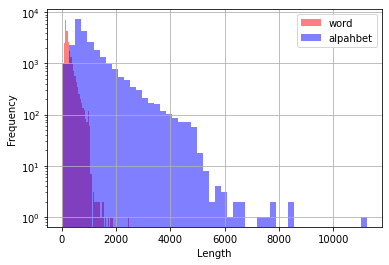

In [24]:
plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = 'b', label = 'alpahbet')

plt.legend()

# 고정된 값은 볼수 없지만 트랜드는 볼수 있다.
plt.yscale('log')

plt.grid()

plt.xlabel('Length')
plt.ylabel('Frequency log')

plt.show()

In [25]:
print('문장 최대길이 : {}'.format(np.max(review_len_by_token)))
print('문장 최소길이 : {}'.format(np.min(review_len_by_token)))
print('문장 평균길이 : {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token)))

# 사분위의 대한 경우는 0 ~ 100 스케일로 되어있음
print('제 1 사분위 길이 : {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이 : 2470
문장 최소길이 : 10
문장 평균길이 : 233.79
문장 길이 표준편차 : 173.73
문장 중간 길이 : 174.0
제 1 사분위 길이 : 127.0
제 3 사분위 길이 : 284.0
